In [2]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pylab
from matplotlib.pyplot import figure
import math


%matplotlib notebook
%matplotlib inline

sns.set(style="white", color_codes=True)

In [3]:
NODE_ITEMS = 100

In [4]:
data = []
for i in range(NODE_ITEMS):
    data.append( (random.randint(1,NODE_ITEMS), random.randint(1,NODE_ITEMS)) )
    
x = []
y = []
for i in data:
    x.append(i[0])
    y.append(i[1])


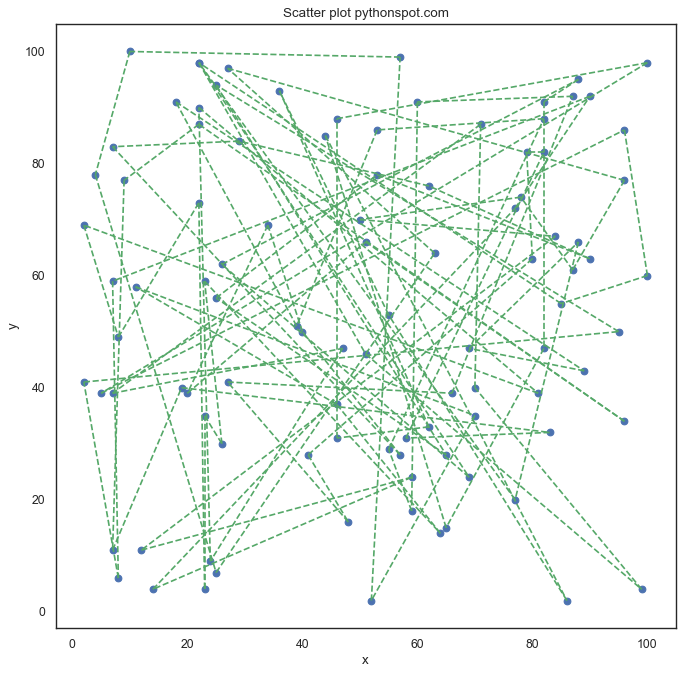

In [5]:
colors = (0,0,0)
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x, y)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')

for i in range(NODE_ITEMS):
    try:
        plt.plot(
            (data[i][0], data[i+1][0]),
            (data[i][1], data[i+1][1]), 
            'g--'
        )
    except IndexError:
        plt.plot(
            (data[i][0], data[0][0]),
            (data[i][1], data[0][1]), 
            'g--'
        )


plt.show()



In [206]:
x_data = data[:]

In [207]:
x_data[:10]

[(43, 17),
 (80, 72),
 (21, 7),
 (83, 84),
 (5, 60),
 (79, 86),
 (65, 13),
 (65, 61),
 (15, 34),
 (80, 71)]

In [208]:
xx_data[:20]

[(1, 11),
 (3, 2),
 (33, 35),
 (14, 29),
 (47, 26),
 (3, 42),
 (45, 1),
 (45, 44),
 (28, 1),
 (32, 47),
 (11, 5),
 (27, 16),
 (35, 44),
 (43, 30),
 (30, 39),
 (7, 8),
 (9, 44),
 (7, 8),
 (20, 46),
 (37, 14)]

In [209]:
xx_data = GenerateStateCandidate(x_data.copy())

In [210]:
def Metric( A, B ):
    """
    Эвклидово расстояние
    """    
    xx = (A[0] - B[0])**2
    yy = (A[1] - B[1])**2
    distance =math.sqrt( xx + yy )     
    
    return distance


In [211]:
def CalculateEnergy(sequence): 
    """
    Целевая функция
    """
    E = 0;
    for i in range(len(data)):
        try:
            E = E + Metric(sequence[i], sequence[i+1])
        except IndexError:
            E = E + Metric(sequence[i], sequence[0])
    return E


In [212]:
def DecreaseTemperature( initialTemperature, k):
    T = initialTemperature * 0.001 / (k+1); 
    return T


In [213]:
CalculateEnergy(x_data)

5521.42085802289

In [214]:
def GenerateStateCandidate(seq):
    #seq - предыдущее состояние (маршрут), из которого 
    #мы хотим получить состояние-кандидат
    
    n = len(seq) # определяем размер последовательности
    i = random.randint(1, n)  # генерируем целое случайное число
    j = random.randint(1, n) # генерируем целое случайное число
        
    if(i > j): 
        seq[j:i] = list(reversed(seq[j:i])) # обращаем подпоследовательность
    else:
        seq[i:j] = list(reversed(seq[i:j])) # обращаем подпоследовательность
    
    return seq


In [215]:
def GetTransitionProbability( dE, T ):
    P = math.exp(-dE/T);
    return P

In [216]:
def IsTransition(probability):
    value = random.random()
    if (value <= probability):
        a = 1
    else:
        a = 0;     
    return a

In [217]:
def SimulatedAnnealing( cities, initialTemperature = 10000, endTemperature = 10, iters =  100000):

    n = len(cities); # получаем размер вектора городов

    state = cities[:]

        
    currentEnergy = CalculateEnergy(state); # вычисляем энергию для первого состояния
    T = initialTemperature;
        
    for i in range(iters):  #на всякий случай ограничеваем количество итераций        
        # может быть полезно при тестировании сложных функций изменения температуры T       
        stateCandidate = GenerateStateCandidate(state.copy()); # получаем состояние-кандидат
        candidateEnergy = CalculateEnergy(stateCandidate); # вычисляем его энергию        
        
        if(candidateEnergy < currentEnergy): # если кандидат обладает меньшей энергией
            currentEnergy = candidateEnergy # то оно становится текущим состоянием
            state = stateCandidate[:]            
            print(candidateEnergy, T)
        else:
            p = GetTransitionProbability(candidateEnergy-currentEnergy, T) # иначе, считаем вероятность
            #print(p)
            if (IsTransition(p) == 1): # и смотрим, осуществится ли переход
                currentEnergy = candidateEnergy
                state = stateCandidate[:]

            T = DecreaseTemperature(initialTemperature, i) # уменьшаем температуру
        
        #print(state[:2])
        if(T <= endTemperature): # условие выхода
            break
    return state


In [222]:
%%time

new_data = SimulatedAnnealing( x_data[:],100000000, 0.001)

5585.994816217264 50000.0
5583.690198116177 50000.0
5504.219661086965 50000.0
5348.73487380178 50000.0
5331.364437321008 50000.0
5319.178804536744 50000.0
5299.227216194213 10000.0
5250.619684993484 8333.333333333334
5234.76215144769 8333.333333333334
5276.839026605917 6250.0
5272.29429860552 6250.0
5237.795777693849 6250.0
5218.638973107872 6250.0
5222.652612918066 4761.9047619047615
5202.31311962837 4761.9047619047615
5197.9015342039975 4761.9047619047615
5207.9734875233535 4000.0
5219.064204773221 3571.4285714285716
5212.051883523498 3333.3333333333335
5217.191706822947 3125.0
5206.3517596175125 2941.176470588235
5242.950583107424 2777.777777777778
5269.618738545529 2631.5789473684213
5251.600814882411 2500.0
5177.046765892728 2500.0
5230.422295985178 2272.7272727272725
5169.220834879642 2272.7272727272725
5151.727793711025 2272.7272727272725
5114.980473082101 2272.7272727272725
5046.574965571151 2272.7272727272725
5095.830151979301 1960.7843137254902
5081.293592550589 1960.78431372

4703.161357568351 107.18113612004288
4649.789591751857 106.72358591248666
4602.585786918378 106.72358591248666
4677.728104071228 106.38297872340425
4683.097766472441 106.04453870625663
4688.829542198852 105.70824524312897
4704.250900360357 105.48523206751055
4613.041805600483 105.15247108307045
4612.362402687992 105.15247108307045
4545.90842545734 105.15247108307045
4527.197449752551 104.71204188481676
4403.501586917892 104.71204188481676
4394.7277232246815 104.27528675703859
4391.575789289786 104.27528675703859
4462.038463467287 103.7344398340249
4409.874731212846 103.7344398340249
4360.768924354737 103.7344398340249
4341.470662380796 103.7344398340249
4515.493917470528 102.35414534288638
4504.516679075144 102.14504596527068
4516.910502028133 101.9367991845056
4495.258225220636 101.9367991845056
4467.692281957282 101.9367991845056
4474.954986952451 101.41987829614604
4444.54063297497 101.41987829614604
4441.604069353787 101.41987829614604
4433.880495853217 101.41987829614604
4455.6279

4491.7107893328875 59.9880023995201
4482.385146464645 59.80861244019139
4433.597741831111 59.73715651135006
4425.3525064959695 59.73715651135006
4406.399727541492 59.523809523809526
4623.858664202172 59.20663114268798
4621.151643540587 59.13660555884092
4589.749352278507 59.06674542232723
4561.9412903328575 58.9622641509434
4561.447115077271 58.9622641509434
4497.693747971681 58.85815185403178
4459.577839970374 58.85815185403178
4450.158836203034 58.68544600938967
4444.487688524213 58.68544600938967
4391.132507821357 58.68544600938967
4371.3473799119065 58.47953216374269
4339.080930917338 58.47953216374269
4325.320120638589 58.343057176196034
4291.475653546724 58.27505827505828
4279.669076625708 58.20721769499418
4273.544377455974 58.10575246949448
4240.066412068135 58.03830528148578
4287.863079254462 57.8368999421631
4310.11428823333 57.736720554272516
4290.431514625824 57.736720554272516
4332.336806613563 57.47126436781609
4331.324623546385 57.47126436781609
4328.1659089518025 57.471

3953.2191096374854 40.766408479412966
3932.288403717393 40.68348250610252
3928.121172066914 40.68348250610252
3919.379463506159 40.61738424045492
3985.775234646471 40.56795131845842
4016.169302454455 40.38772213247173
4022.2546766038763 40.338846308995564
4013.3964515515604 40.338846308995564
4269.331640481375 40.19292604501608
4279.772987061521 40.16064257028113
4273.910050352445 40.16064257028113
4187.168927786973 40.11231448054553
4154.182331513779 40.11231448054553
4123.296368256793 40.04805766920305
4135.532078135396 40.016006402561025
4118.088909521947 39.920159680638726
4116.520849979747 39.87240829346093
4090.6159437467263 39.87240829346093
4084.442355103583 39.80891719745223
4083.9597778684342 39.77724741447892
4085.441647590556 39.72983710766786
4055.241146153026 39.72983710766786
3991.133778742526 39.666798889329634
4046.915702330264 39.5882818685669
4045.770469373886 39.55696202531646
4051.9486777122975 39.46329913180742
4047.907451257828 39.40110323089046
4148.341862710254

3464.7965911017586 29.940119760479043
3456.616235746516 29.91325157044571
3601.386865416218 29.86857825567503
3613.6171830760327 29.841838257236645
3578.230862313786 29.841838257236645
3574.9090411095945 29.797377830750893
3589.158258648062 29.779630732578916
3564.0222621062653 29.7441998810232
3532.9653081474307 29.708853238265004
3734.7329219153257 29.620853080568722
3730.9983320124525 29.577048210588583
3735.64582045772 29.515938606847698
3713.8772299571697 29.515938606847698
3702.8444889977354 29.4811320754717
3701.8379400362683 29.463759575721863
3571.0288875063134 29.44640753828033
3535.2464199420965 29.44640753828033
3524.5872945545866 29.40311673037342
3519.49067512183 29.37720329024677
3503.136123196919 29.35995302407516
3497.070977257908 29.35995302407516
3575.3038609686764 29.325513196480937
3573.0925737832154 29.308323563892145
3570.9469064498794 29.308323563892145
3536.801183782838 29.239766081871345
3529.437215420524 29.205607476635514
3501.1822222587666 29.20560747663551

3087.8734883909547 23.58490566037736
3057.982468036972 23.557126030624264
3073.8755526918762 23.52387673488591
3070.389833137942 23.52387673488591
3062.4108927740035 23.474178403755868
3060.346170501896 23.457658925639223
3034.8331979002533 23.44116268166901
3059.4023184389534 23.408239700374533
3060.008119443296 23.380874444704233
3057.607952367359 23.380874444704233
3030.661736534821 23.34812047630166
3024.076886163645 23.33177788147457
3011.1480176008713 23.33177788147457
3011.0387066776116 23.28830926874709
3006.683246760886 23.277467411545622
2979.2433115034964 23.266635644485806
2936.3332907827503 23.266635644485806
2931.829526073428 23.266635644485806
2944.724121992145 23.228803716608596
2934.129659020273 23.212627669452182
2920.4290367531985 23.174971031286212
2914.3734963418756 23.164234422052353
2907.717355250648 23.164234422052353
2910.3584553875926 23.121387283236995
2940.0386523171946 23.089355806972986
2919.2781890041147 23.078698361412417
2928.608141339507 22.99908003679

2716.299853632927 15.56178026766262
2725.783397460959 15.54726368159204
2712.6187149754346 15.54001554001554
2705.8853407212487 15.532774153463809
2642.042065298005 15.532774153463809
2634.9124507348643 15.52553951249806
2600.989320035438 15.518311607697083
2596.1792550292053 15.506280043417584
2561.1523203237903 15.487068297971193
2542.4001933556215 15.465511908444169
2538.8128385334303 15.465511908444169
2556.4541394717203 15.43448062972681
2529.40052369456 15.4273372415921
2540.641286678402 15.415446277169725
2539.412331688491 15.410695022345507
2514.6667349649983 15.410695022345507
2520.0622307111094 15.398829688943641
2563.1503206391117 15.365703749231715
2523.04662347521 15.356265356265355
2522.285348954915 15.349194167306216
2556.810533043656 15.29753709652746
2551.7118629441693 15.285845307245491
2581.213751525038 15.248551387618177
2569.2611409483125 15.24390243902439
2581.5305598969953 15.202189115232594
2651.1733177415626 15.16530178950561
2637.672827729803 15.15840533575867

2018.6928080314046 11.065619121389842
2013.0051613407613 11.065619121389842
2011.408805057313 11.065619121389842
2009.4384915357743 11.048502927853276
2002.641371935935 11.024142872891632
1984.9282468524834 11.004732034774953
1973.0059686632922 10.996261271167803
1976.3149378489263 10.975743606629349
1963.3706336219432 10.969723562966212
1970.862102634298 10.922992900054615
1963.9997063662495 10.911074740861975
1967.9623235090708 10.884946119516709
1993.34859528995 10.864841373315949
1975.3301107470497 10.862480990658266
1973.1124243255222 10.851871947911015
1978.9572945401283 10.826025765941322
1922.865234051516 10.818998160770313
1907.17712745641 10.80613788631943
1901.8522044801887 10.790978741771879
1892.5986557277777 10.790978741771879
1886.949054425905 10.779346771585642
1916.3772967462846 10.716964955524595
1929.5500806205428 10.705491917353603
2014.3526020923184 10.650761529449357
2033.5783972728034 10.640561821664184
2032.534893905795 10.640561821664184
2030.6254528743734 10.6

1720.421503223386 7.566013467503972
1718.3881788215626 7.552870090634441
1710.0735339270127 7.551159102922298
1755.9429238765008 7.534091765237701
1739.943824253884 7.534091765237701
1736.9944613886992 7.534091765237701
1725.0946816985668 7.528986598403855
1716.7118587641312 7.519927808693036
1721.2234935428564 7.5046904315197
1744.7259044770417 7.487271638215034
1736.4247682969149 7.485590238790329
1736.360005786572 7.479431563201197
1719.0288437326622 7.477194556602363
1706.187408980761 7.468817686160281
1694.0296522628473 7.446570854121677
1657.4760480540633 7.445461990916536
1658.577050422625 7.429420505200595
1654.4850922770133 7.427764985515858
1662.5463574828736 7.4134479946623175
1696.009914581678 7.403020432336393
1688.8737807924613 7.392622163081245
1663.298180848183 7.392622163081245
1636.2020691732237 7.388252678241596
1631.8362421424413 7.385524372230428
1628.70722847114 7.377351530800443
1663.9123222217045 7.357268981753973
1651.2998947343126 7.352941176470588
1678.693402

1243.7263947242168 4.7757772577486985
1241.148519848004 4.772358499570488
1252.2272148400853 4.745859237815006
1249.9116658578448 4.741358873453132
1297.116494811248 4.7247814788566025
1278.1102916169782 4.724335049841735
1270.647039928996 4.716536175832468
1269.9538779315224 4.714534911131017
1269.9532478270085 4.712757434374852
1273.3403275393284 4.683182690956774
1270.4014524984686 4.682305567261319
1267.5109104984053 4.674863260249638
1266.9893695728342 4.656794262829468
1260.4052216086204 4.655710228595372
1253.550802364048 4.64187903263241
1269.3746128505302 4.6236360273719255
1265.3209950824023 4.61723150798781
1246.3936887085745 4.605960112385427
1245.5183331452934 4.597067071208569
1245.133785533323 4.593266271645767
1241.6469965415638 4.587366392953805
1232.8877003981777 4.583581610670578
1220.4788362909728 4.577706569008926
1219.975927112837 4.569339730408956
1243.3122027946781 4.537822752643282
1241.5280605596884 4.534941725998821
1241.2677522097053 4.534324839031468
1236.2

845.2286995900556 2.290793301720386
846.2260958593992 2.2875443211712225
845.6801695870682 2.276348736626451
847.9510495073557 2.207505518763797
846.8965155221847 2.1697621940635305
846.8965155221847 2.155125967112778
846.4294548670198 2.1369804466289133
851.2999364596875 2.1235931195582927
853.02912268693 2.112646300756327
853.02912268693 2.103890092781553
853.8009568585798 2.0833333333333335
859.925552773241 2.051618727175742
857.5078363360602 2.0468734008801555
855.8511639607608 2.0427339951791477
850.5871544476747 2.0400669141947856
854.8983803433108 2.0128419315231176
854.8983803433108 1.9811395514700056
854.4475454758572 1.9618229258627116
856.2368753436516 1.9470784088475244
855.786040476198 1.9302038295243977
855.7860404761979 1.9155987203800549
854.4122733060374 1.8856895023665403
854.4122733060372 1.8834519908087544
854.31718190116 1.868425477849816
849.3041568687684 1.855907353104933
844.59973880451 1.8389113644722324
853.2580327707558 1.7952354451286285
858.3833691080113 1.

In [223]:
CalculateEnergy(new_data)

828.2988695931537

In [220]:
for i in range(10):
    print (new_data[i], x_data[i], data[i])

(43, 17) (43, 17) (43, 17)
(36, 24) (80, 72) (80, 72)
(32, 27) (21, 7) (21, 7)
(35, 32) (83, 84) (83, 84)
(35, 36) (5, 60) (5, 60)
(32, 35) (79, 86) (79, 86)
(30, 37) (65, 13) (65, 13)
(23, 42) (65, 61) (65, 61)
(23, 44) (15, 34) (15, 34)
(24, 34) (80, 71) (80, 71)


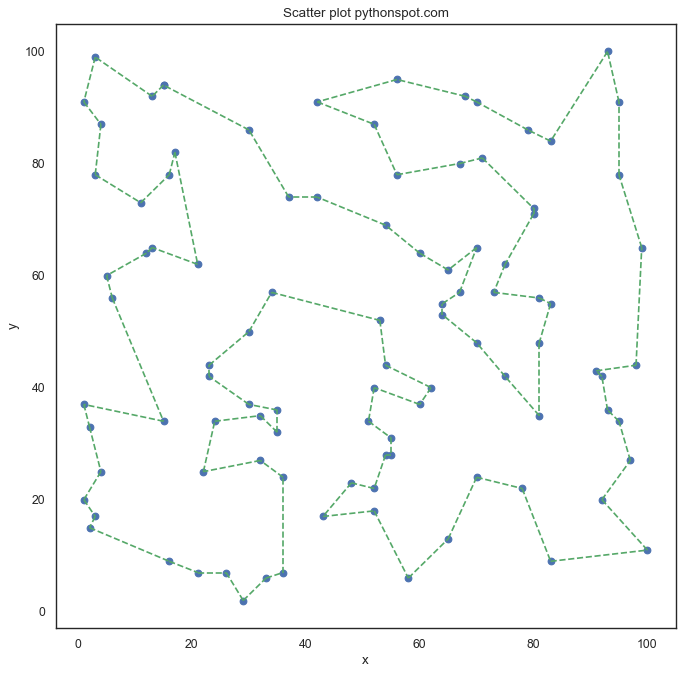

In [224]:
colors = (0,0,0)
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x, y)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')

for i in range(NODE_ITEMS):
    try:
        plt.plot(
            (new_data[i][0], new_data[i+1][0]),
            (new_data[i][1], new_data[i+1][1]), 
            'g--'
        )
    except IndexError:
        plt.plot(
            (new_data[i][0], new_data[0][0]),
            (new_data[i][1], new_data[0][1]), 
            'g--'
        )


plt.show()